In [1]:
#Initialization and imports
%matplotlib inline
%run config.py
import dataframes as dfs
dfBuilder = dfs.DataFramesBuilder()
enotites = dfs.defs.enotites
#Read exoda file into dataframe
df = dfBuilder.read_exoda("../data/ex_2015.xls")
#Add the extra fields
df = dfBuilder.add_extra_fields()

#Define the fields to plot
plot_field = 'plirothenta'
plot_fields_array = ['eggekrimenos','diamorfomenos','desmefthenta','plirothenta']

##ΦΟΡΕΙΣ

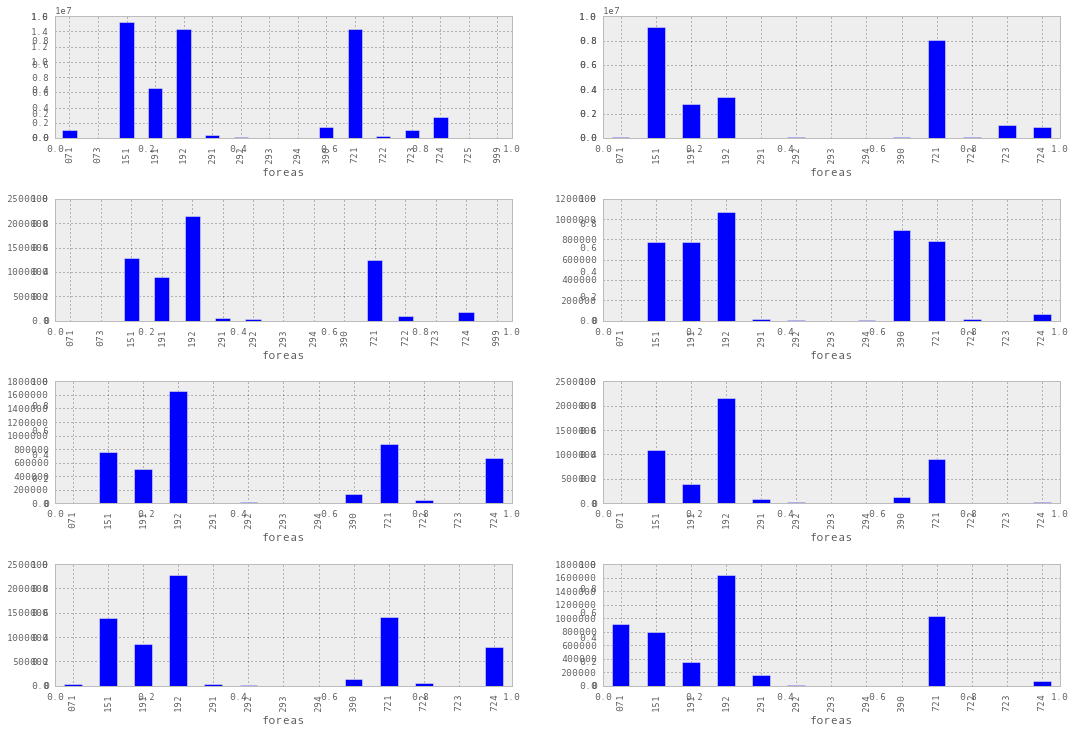

In [2]:
#Get the foreis only dataframe
dfex = dfBuilder.get_foreis_df(df)

fig, axes = plt.subplots(4, 2, figsize=(18,12))
#Work with all pkm
dfpkm = dfex.groupby(['foreas']).sum()
fig.add_subplot(421)
dfpkm[plot_field].plot(kind='bar')

for i in sorted(enotites.keys()):
    if i == '00':
        continue
    dfen = dfex[dfex.enotita==i]
    dfen = dfen.groupby(['foreas']).sum()
    fig.add_subplot(4, 2, int(i)+1)
    dfen[plot_field].plot(kind='bar')

###Συγκριτικά Ενοτήτων με βάση το φορέα

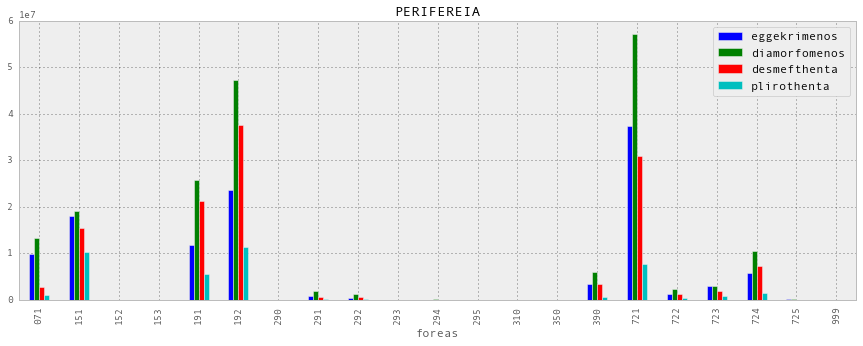

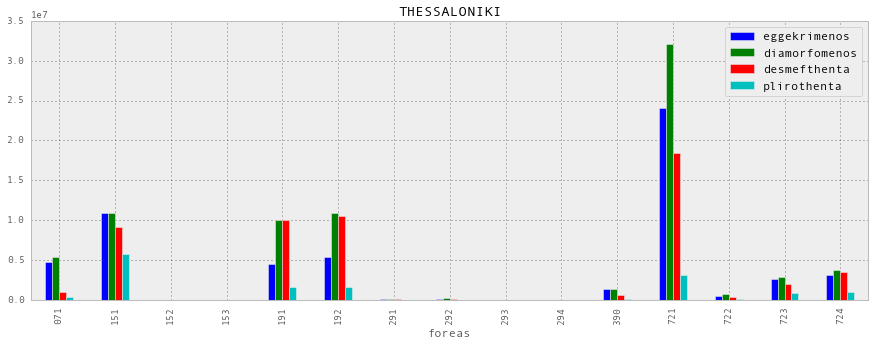

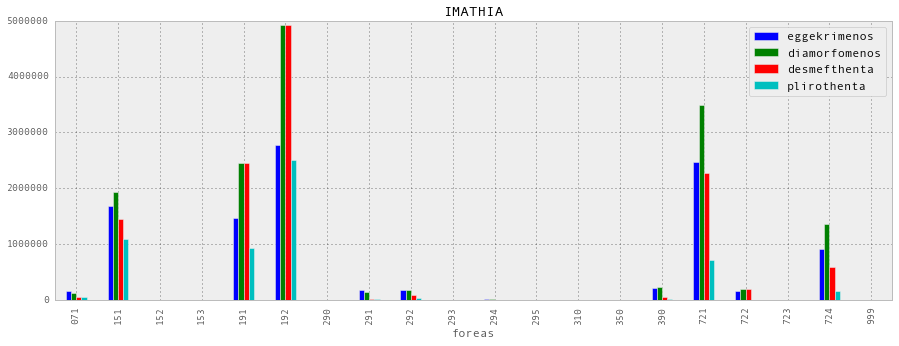

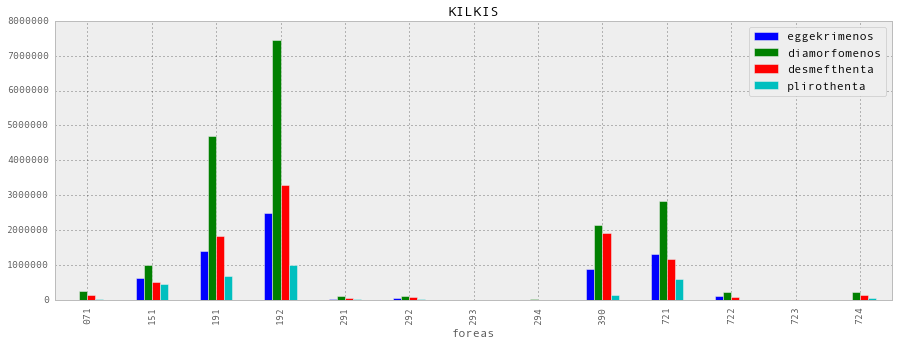

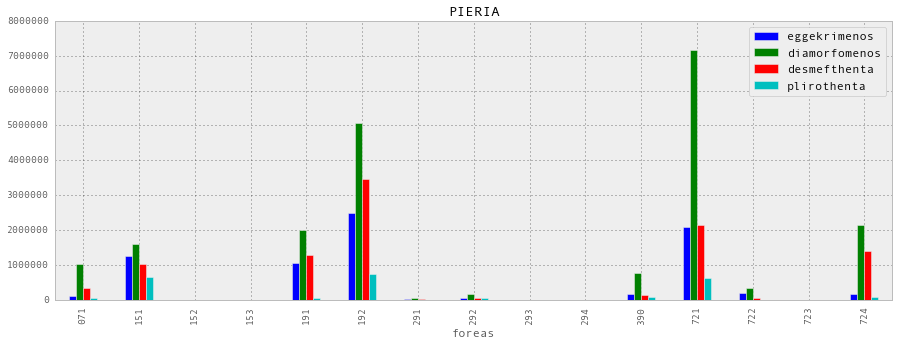

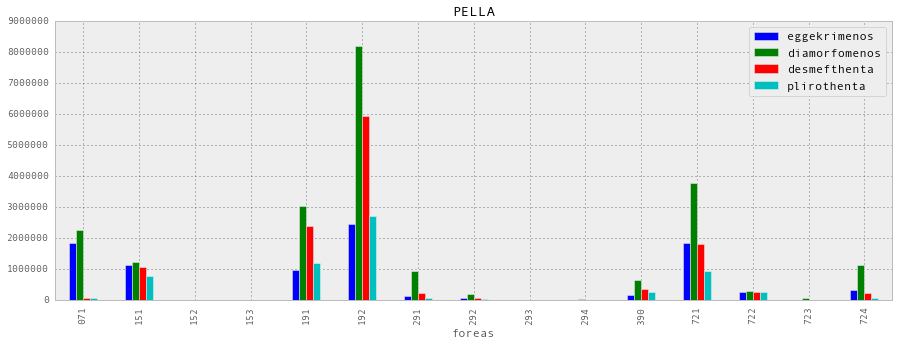

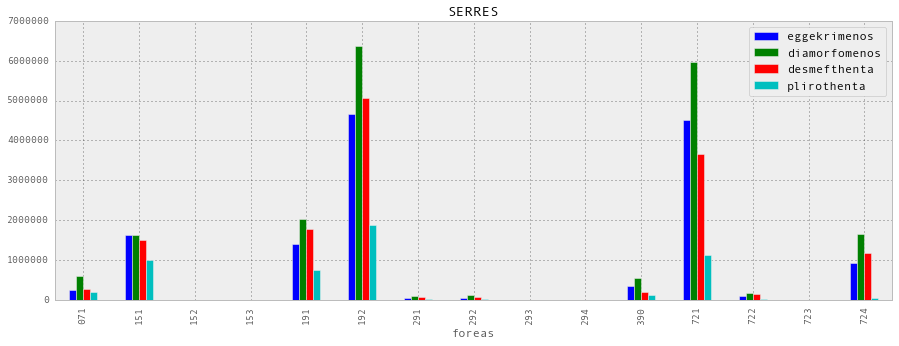

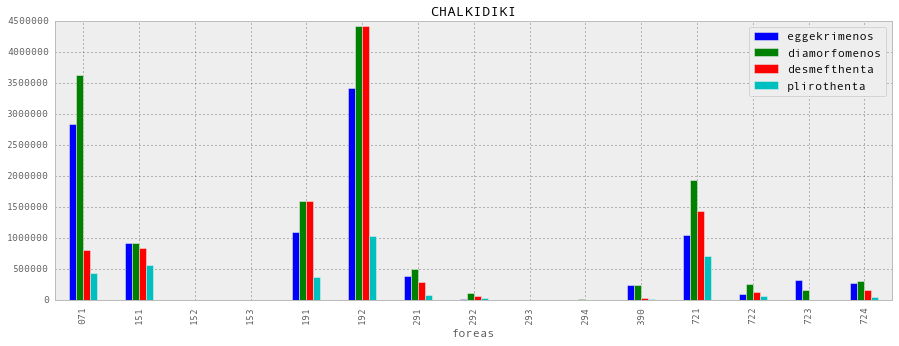

In [3]:
#Work with all pkm
dfpkm = dfex.groupby(['foreas']).sum()
dfpkm[plot_fields_array].plot(kind='bar',title = 'PERIFEREIA')

for i in sorted(enotites.keys()):
    if i == '00':
        continue
    dfen = dfex[dfex.enotita==i]
    dfen = dfen.groupby(['foreas']).sum()
    dfen[plot_fields_array].plot(kind='bar',title = enotites[i])

##ΧΙΛΙΑΔΑ ΚΑΕ

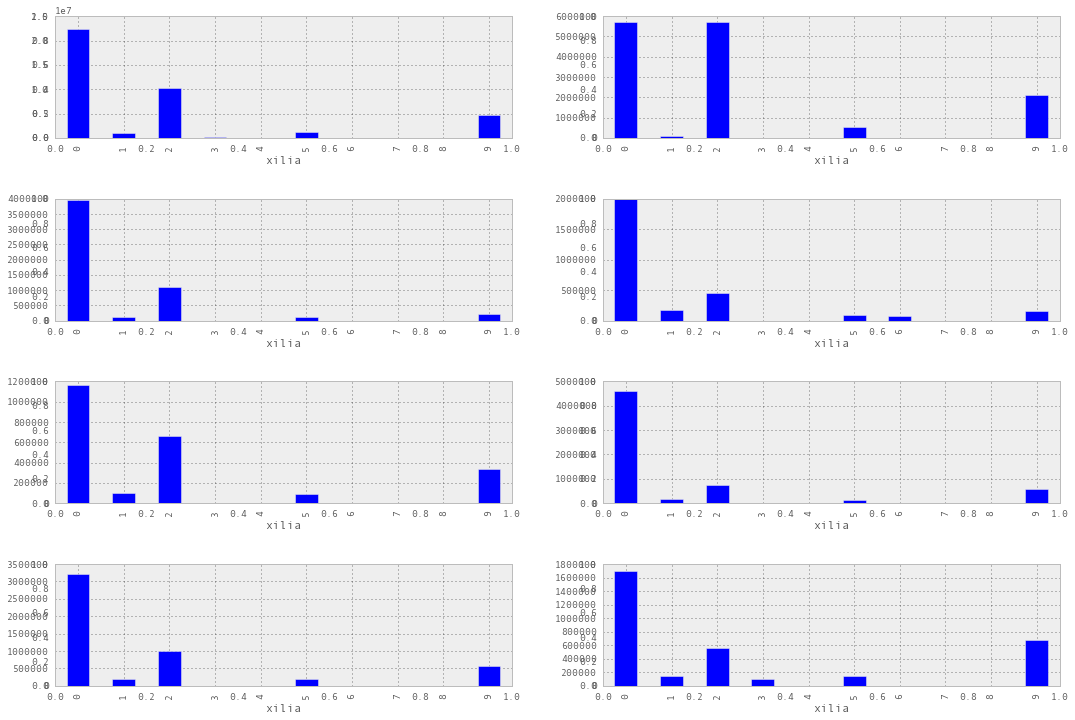

In [4]:
#Get the dataframe consisting only of thousands
dfex = dfBuilder.get_xilia_df(df)

fig, axes = plt.subplots(4, 2, figsize=(18,12))
#Work with all pkm
dfpkm = dfex.groupby(['xilia']).sum()
fig.add_subplot(421)
dfpkm[plot_field].plot(kind='bar')

for i in sorted(enotites.keys()):
    if i == '00':
        continue
    dfen = dfex[dfex.enotita == i]
    dfen = dfen.groupby(['xilia']).sum()
    fig.add_subplot(4, 2, int(i) + 1)
    dfen[plot_field].plot(kind='bar')

###Συγκριτικά ενοτήτων με βάση τη χιλιάδα

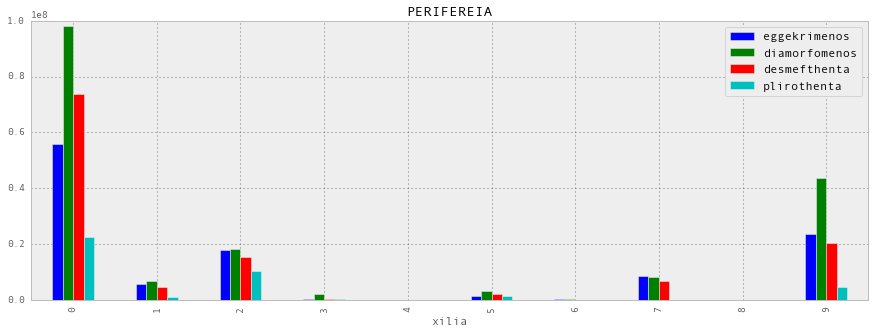

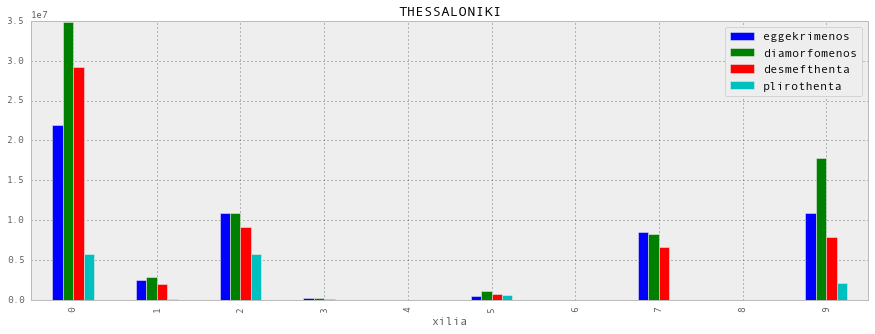

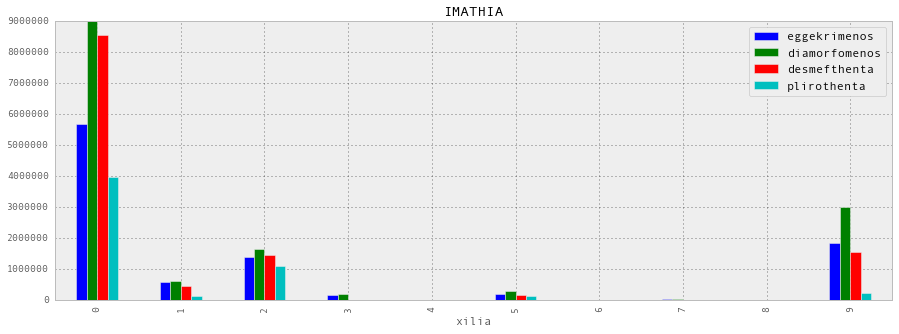

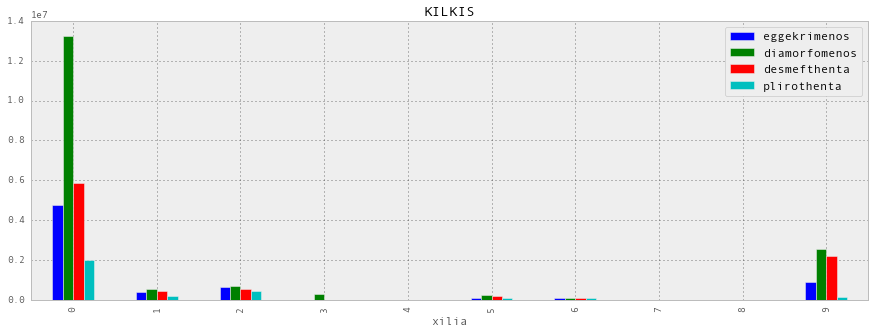

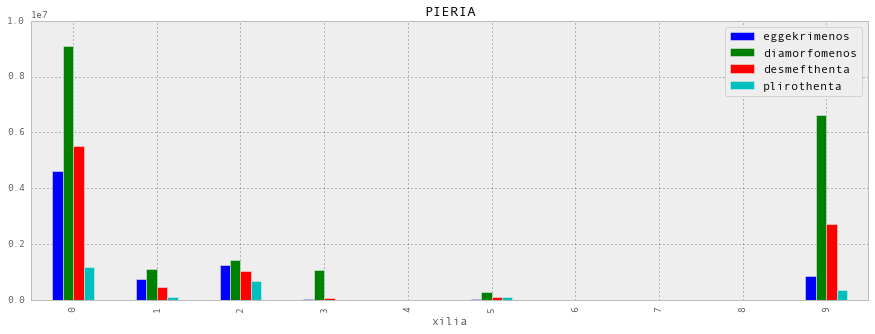

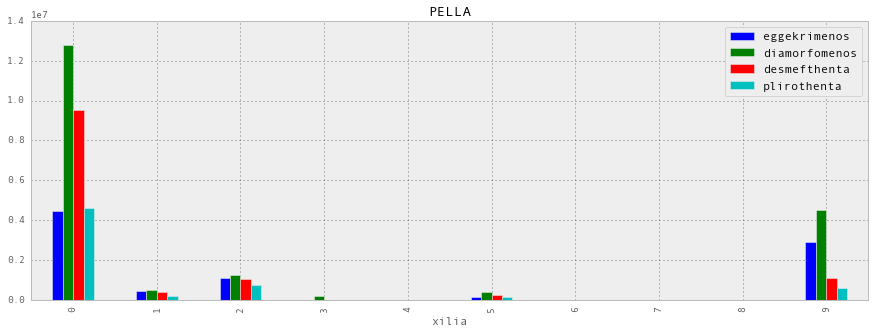

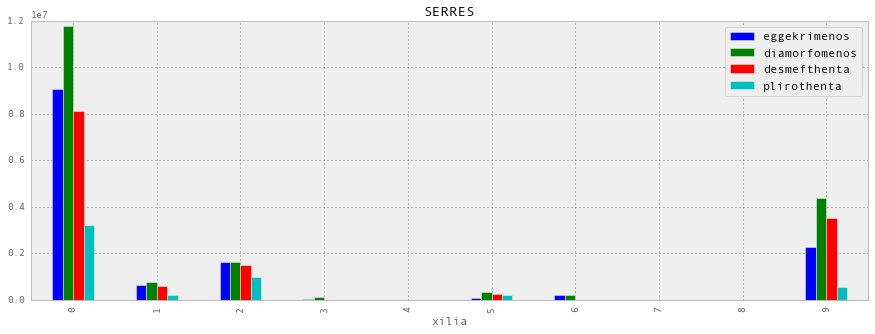

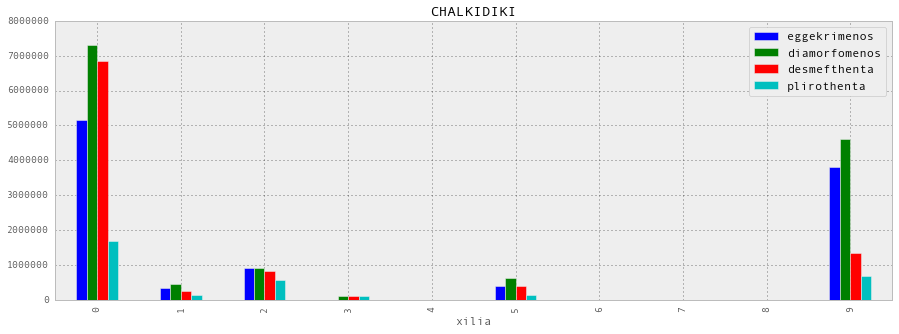

In [5]:
#Work with all pkm
dfpkm = dfex.groupby(['xilia']).sum()
dfpkm[plot_fields_array].plot(kind='bar',title='PERIFEREIA')

for i in sorted(enotites.keys()):
    if i == '00':
        continue
    dfen = dfex[dfex.enotita == i]
    dfen = dfen.groupby(['xilia']).sum()
    dfen[plot_fields_array].plot(kind='bar', title=enotites[i])

##Εκατοντάδες της Χιλιάδας που δίνουμε ως βάση

In [ ]:
#Get the dataframe consisting only of hundreds of thousand t
t = '0'
dfex = dfBuilder.get_ekato_df(df)
dfex = dfex[dfex.xilia == t]
fig, axes = plt.subplots(4, 2, figsize=(18,12))
#Work with all pkm

dfpkm = dfex.groupby(['ekato']).sum()
fig.add_subplot(421)
dfpkm[plot_field].plot(kind='bar')

for i in sorted(enotites.keys()):
    if i == '00':
        continue
    dfen = dfex[dfex.enotita == i]
    dfen = dfen.groupby(['ekato']).sum()
    fig.add_subplot(4, 2, int(i) + 1)
    dfen[plot_field].plot(kind='bar')

###Συγκριτικά ενοτήτων με βάση την εκατοντάδα

In [ ]:
#Work with all pkm
dfpkm = dfex.groupby(['ekato']).sum()
dfpkm[plot_fields_array].plot(kind='bar',title='PERIFEREIA')

for i in sorted(enotites.keys()):
    if i == '00':
        continue
    dfen = dfex[dfex.enotita == i]
    dfen = dfen.groupby(['ekato']).sum()
    dfen[plot_fields_array].plot(kind='bar', title=enotites[i])

#Ενοποίηση όλων των ετών

In [2]:
d12 = dfBuilder.read_exoda("../data/ex_2012.xls")
d12['year'] = '2012'
d13 = dfBuilder.read_exoda("../data/ex_2013.xls")
d13['year'] = '2013'
d14 = dfBuilder.read_exoda("../data/ex_2014.xls")
d14['year'] = '2014'
d = d12.append(d13.append(d14))
dfBuilder.set_inner_dataframe(d)
d = dfBuilder.add_extra_fields()

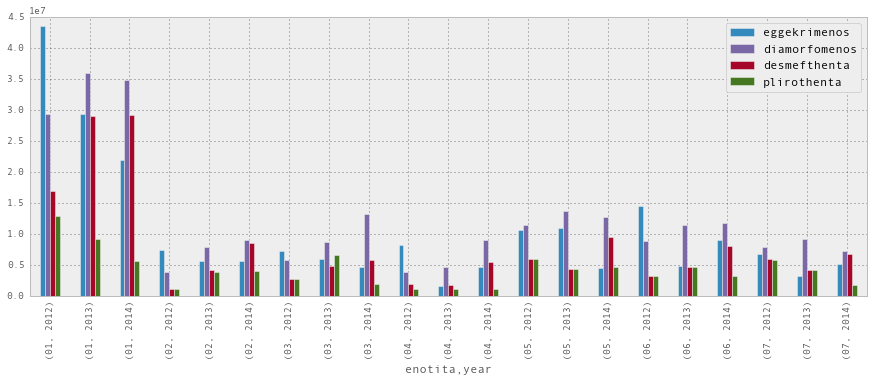

In [16]:
#Get the data as foreis
dd = dfBuilder.get_xilia_df(d)
dd = dd[(dd.enotita!='00') & (dd.xilia == '0')]
dd = dd[['year','enotita','eggekrimenos','diamorfomenos','desmefthenta','plirothenta']]
dg = dd.groupby(['enotita','year']).sum()
dg.plot(kind='bar')